In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('Kindle_review_preprocessed')
df.head(2)

,Unnamed: 0,reviewText,rating
0,0,jace rankin may short he nothing mess man haul...,0
1,1,great short read didnt want put read one sitti...,1


In [7]:
#Creating Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['reviewText'],df['rating'],test_size=0.20,random_state=42)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
bow=CountVectorizer()
X_train_bow=bow.fit_transform(X_train).toarray()  #Using Bag Of Words to transform sentences into vectors
X_test_bow=bow.transform(X_test).toarray()

In [9]:
from sklearn.naive_bayes import GaussianNB
nb_model_bow=GaussianNB().fit(X_train_bow,y_train) #Applying Gaussian Naive Bayes Classifier

In [10]:
y_pred=nb_model_bow.predict(X_test_bow)

In [11]:
from sklearn.metrics import accuracy_score,classification_report,roc_curve
print("Accuracy Score=",accuracy_score(y_pred,y_test))
print("classification_report=",classification_report(y_pred,y_test))

Accuracy Score= 0.5895833333333333
classification_report=               precision    recall  f1-score   support

           0       0.77      0.56      0.65      1621
           1       0.41      0.64      0.50       779

    accuracy                           0.59      2400
   macro avg       0.59      0.60      0.58      2400
weighted avg       0.65      0.59      0.60      2400



In [1]:
import matplotlib.pyplot as plt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23468\404773733.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


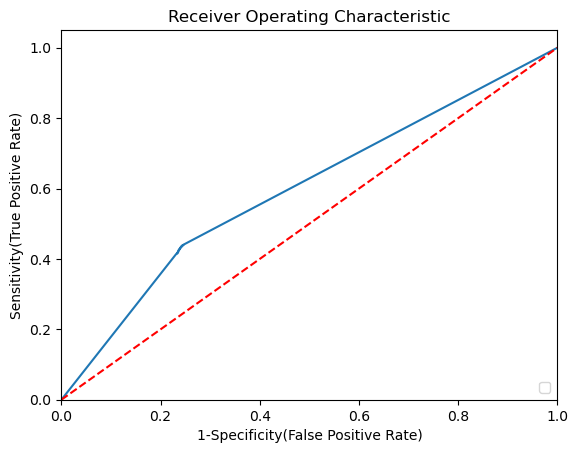

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, nb_model_bow.predict_proba(X_test_bow)[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()

In [14]:
#The accuracy is not quite satisfactory. Moreover from the ROC-AUC curve , it does not seem to be a good fit